In [11]:
# Importing required libraries 

import sklearn, h5py
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import numpy as np
from numpy import savetxt
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
#from tensorflow import keras
#from tensorflow.python.keras import backend
#from tensorflow.python.keras.callbacks import TensorBoard, ModelCheckpoint
import os
from time import time
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

import keras
from keras import regularizers
from keras import backend
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint, TensorBoard

# Other  
import librosa
import librosa.display

import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

import pickle
# ignore warnings 
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [47]:
ravdessPath ='/home/czerwone/Desktop/Datasets/Ravdess/';
tessPath ='/home/czerwone/Desktop/Datasets/TESS/';

global SR,HOP,HOP_LENGTH,LABELS,MFCC;
SR =48000;
HOP = 0.20;
HOP_LENGTH = int(HOP*SR);
MFCC = 13;
LABELS = {1:"Neutral", 2:"Calm", 3:"Happy", 4:"Sad", 5:"Angry", 6:"Fearful", 7:"Disgust", 8:"Surprised"};

In [48]:
#Ravdess Data Preparation
lengthValsRavdess,labelStatRavdess = getDatasetStats(ravdessPath);
X_Rav = extractMFCCFeature(ravdessPath,lengthValsRavdess[2],nMfcc=MFCC);
X_Norm_Rav = dataNormalization(X_Rav);
YNc_Rav = np.array(classifyData(ravdessPath,False));

In [49]:
#TESS Data Preparation
lengthValsTess,labelStatTess = getDatasetStats(tessPath,False);
X_Tess = extractMFCCFeature(tessPath,lengthValsRavdess[2],nMfcc=MFCC);
X_Norm_Tess = dataNormalization(X_Tess);
YNc_Tess = np.array(classifyData(tessPath,False,False));

In [30]:
#Test Only Ravdess
cnnRavdess = cnn(YNc_Rav[:,0]-1,X_Norm_Rav,0.2,0.2);
cnnRavdess.split_train_test();
cnnRavdess.build_model();

built cnn model..
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 50, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 48, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 12, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 12, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 12, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 

In [31]:
startTime = time();
historyRavdess = cnnRavdess.train();
time()-startTime

training model
Epoch 1/500
27/27 [==============================] - 4s 121ms/step - loss: 2.0730 - accuracy: 0.0989 - val_loss: 2.0505 - val_accuracy: 0.1528

Epoch 00001: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 2/500
27/27 [==============================] - 2s 87ms/step - loss: 2.0536 - accuracy: 0.1649 - val_loss: 2.0339 - val_accuracy: 0.2118

Epoch 00002: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 3/500
27/27 [==============================] - 2s 87ms/step - loss: 2.0337 - accuracy: 0.1703 - val_loss: 2.0138 - val_accuracy: 0.1806

Epoch 00003: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 4/500
27/27 [==============================] - 2s 85ms/step - loss: 2.0107 - accuracy: 0.1953 - val_loss: 1.9913 - val_accuracy: 0.2917

Epoch 00004: 


Epoch 00030: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 31/500
27/27 [==============================] - 2s 91ms/step - loss: 1.5866 - accuracy: 0.3899 - val_loss: 1.5667 - val_accuracy: 0.4201

Epoch 00031: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 32/500
27/27 [==============================] - 3s 99ms/step - loss: 1.5617 - accuracy: 0.4228 - val_loss: 1.5688 - val_accuracy: 0.4236

Epoch 00032: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 33/500
27/27 [==============================] - 3s 98ms/step - loss: 1.5175 - accuracy: 0.4369 - val_loss: 1.5282 - val_accuracy: 0.4792

Epoch 00033: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 34/500
27/27 [===============

27/27 [==============================] - 2s 91ms/step - loss: 1.3151 - accuracy: 0.5254 - val_loss: 1.4028 - val_accuracy: 0.4861

Epoch 00060: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 61/500
27/27 [==============================] - 2s 81ms/step - loss: 1.2567 - accuracy: 0.5256 - val_loss: 1.3816 - val_accuracy: 0.5174

Epoch 00061: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 62/500
27/27 [==============================] - 3s 97ms/step - loss: 1.2171 - accuracy: 0.5618 - val_loss: 1.4111 - val_accuracy: 0.4722

Epoch 00062: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 63/500
27/27 [==============================] - 3s 99ms/step - loss: 1.2564 - accuracy: 0.5002 - val_loss: 1.3895 - val_accuracy: 0.4965

Epoch 00063: saving model to /home/cze

27/27 [==============================] - 3s 127ms/step - loss: 1.0008 - accuracy: 0.6223 - val_loss: 1.3069 - val_accuracy: 0.5243

Epoch 00090: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 91/500
27/27 [==============================] - 3s 96ms/step - loss: 1.0233 - accuracy: 0.5950 - val_loss: 1.3027 - val_accuracy: 0.5174

Epoch 00091: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 92/500
27/27 [==============================] - 3s 111ms/step - loss: 1.0014 - accuracy: 0.6321 - val_loss: 1.3121 - val_accuracy: 0.5208

Epoch 00092: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 93/500
27/27 [==============================] - 3s 104ms/step - loss: 1.0054 - accuracy: 0.6304 - val_loss: 1.3123 - val_accuracy: 0.5174

Epoch 00093: saving model to /home/


Epoch 00119: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 120/500
27/27 [==============================] - 3s 94ms/step - loss: 0.8659 - accuracy: 0.6890 - val_loss: 1.2810 - val_accuracy: 0.5486

Epoch 00120: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 121/500
27/27 [==============================] - 2s 90ms/step - loss: 0.7837 - accuracy: 0.7411 - val_loss: 1.2682 - val_accuracy: 0.5521

Epoch 00121: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 122/500
27/27 [==============================] - 3s 97ms/step - loss: 0.8192 - accuracy: 0.6878 - val_loss: 1.2880 - val_accuracy: 0.5347

Epoch 00122: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 123/500
27/27 [===========

27/27 [==============================] - 3s 110ms/step - loss: 0.6352 - accuracy: 0.7896 - val_loss: 1.3134 - val_accuracy: 0.5521

Epoch 00149: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 150/500
27/27 [==============================] - 2s 86ms/step - loss: 0.6308 - accuracy: 0.7791 - val_loss: 1.3238 - val_accuracy: 0.5382

Epoch 00150: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 151/500
27/27 [==============================] - 2s 93ms/step - loss: 0.6168 - accuracy: 0.7796 - val_loss: 1.3007 - val_accuracy: 0.5521

Epoch 00151: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 152/500
27/27 [==============================] - 2s 91ms/step - loss: 0.5539 - accuracy: 0.8045 - val_loss: 1.2972 - val_accuracy: 0.5451

Epoch 00152: saving model to /home


Epoch 00178: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 179/500
27/27 [==============================] - 3s 100ms/step - loss: 0.5086 - accuracy: 0.7997 - val_loss: 1.3691 - val_accuracy: 0.5417

Epoch 00179: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 180/500
27/27 [==============================] - 3s 97ms/step - loss: 0.4558 - accuracy: 0.8358 - val_loss: 1.3776 - val_accuracy: 0.5451

Epoch 00180: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 181/500
27/27 [==============================] - 2s 90ms/step - loss: 0.5132 - accuracy: 0.8216 - val_loss: 1.3871 - val_accuracy: 0.5625

Epoch 00181: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 182/500
27/27 [==========

27/27 [==============================] - 3s 105ms/step - loss: 0.3896 - accuracy: 0.8559 - val_loss: 1.4859 - val_accuracy: 0.5625

Epoch 00208: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 209/500
27/27 [==============================] - 3s 94ms/step - loss: 0.3542 - accuracy: 0.8977 - val_loss: 1.5177 - val_accuracy: 0.5451

Epoch 00209: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 210/500
27/27 [==============================] - 3s 97ms/step - loss: 0.3216 - accuracy: 0.8930 - val_loss: 1.5577 - val_accuracy: 0.5417

Epoch 00210: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 211/500
27/27 [==============================] - 2s 89ms/step - loss: 0.3515 - accuracy: 0.8859 - val_loss: 1.4842 - val_accuracy: 0.5590

Epoch 00211: saving model to /home


Epoch 00237: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 238/500
27/27 [==============================] - 3s 97ms/step - loss: 0.2725 - accuracy: 0.9135 - val_loss: 1.6138 - val_accuracy: 0.5521

Epoch 00238: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 239/500
27/27 [==============================] - 3s 101ms/step - loss: 0.2631 - accuracy: 0.9232 - val_loss: 1.6341 - val_accuracy: 0.5764

Epoch 00239: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 240/500
27/27 [==============================] - 3s 106ms/step - loss: 0.2856 - accuracy: 0.9031 - val_loss: 1.6414 - val_accuracy: 0.5729

Epoch 00240: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 241/500
27/27 [=========

27/27 [==============================] - 3s 96ms/step - loss: 0.2007 - accuracy: 0.9230 - val_loss: 1.7651 - val_accuracy: 0.6007

Epoch 00267: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 268/500
27/27 [==============================] - 3s 118ms/step - loss: 0.1693 - accuracy: 0.9401 - val_loss: 1.7234 - val_accuracy: 0.5799

Epoch 00268: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 269/500
27/27 [==============================] - 2s 92ms/step - loss: 0.2152 - accuracy: 0.9228 - val_loss: 1.7423 - val_accuracy: 0.5868

Epoch 00269: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 270/500
27/27 [==============================] - 3s 101ms/step - loss: 0.1632 - accuracy: 0.9584 - val_loss: 1.7509 - val_accuracy: 0.5729

Epoch 00270: saving model to /hom


Epoch 00296: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 297/500
27/27 [==============================] - 2s 86ms/step - loss: 0.1362 - accuracy: 0.9549 - val_loss: 1.8603 - val_accuracy: 0.5833

Epoch 00297: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 298/500
27/27 [==============================] - 3s 94ms/step - loss: 0.1092 - accuracy: 0.9616 - val_loss: 1.8824 - val_accuracy: 0.5833

Epoch 00298: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 299/500
27/27 [==============================] - 3s 99ms/step - loss: 0.0977 - accuracy: 0.9744 - val_loss: 1.9231 - val_accuracy: 0.5833

Epoch 00299: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 300/500
27/27 [===========

27/27 [==============================] - 2s 92ms/step - loss: 0.0998 - accuracy: 0.9761 - val_loss: 2.0080 - val_accuracy: 0.5972

Epoch 00326: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 327/500
27/27 [==============================] - 2s 92ms/step - loss: 0.1010 - accuracy: 0.9771 - val_loss: 1.9871 - val_accuracy: 0.5868

Epoch 00327: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 328/500
27/27 [==============================] - 3s 98ms/step - loss: 0.0929 - accuracy: 0.9707 - val_loss: 2.0064 - val_accuracy: 0.6042

Epoch 00328: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 329/500
27/27 [==============================] - 3s 102ms/step - loss: 0.0960 - accuracy: 0.9720 - val_loss: 2.0639 - val_accuracy: 0.6111

Epoch 00329: saving model to /home


Epoch 00355: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 356/500
27/27 [==============================] - 3s 103ms/step - loss: 0.0833 - accuracy: 0.9700 - val_loss: 2.1321 - val_accuracy: 0.5972

Epoch 00356: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 357/500
27/27 [==============================] - 3s 110ms/step - loss: 0.0608 - accuracy: 0.9834 - val_loss: 2.1909 - val_accuracy: 0.5903

Epoch 00357: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 358/500
27/27 [==============================] - 3s 98ms/step - loss: 0.0758 - accuracy: 0.9809 - val_loss: 2.0867 - val_accuracy: 0.5972

Epoch 00358: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 359/500
27/27 [=========

27/27 [==============================] - 2s 90ms/step - loss: 0.0456 - accuracy: 0.9844 - val_loss: 2.2050 - val_accuracy: 0.5833

Epoch 00385: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 386/500
27/27 [==============================] - 3s 103ms/step - loss: 0.0494 - accuracy: 0.9903 - val_loss: 2.1714 - val_accuracy: 0.5868

Epoch 00386: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 387/500
27/27 [==============================] - 3s 107ms/step - loss: 0.0516 - accuracy: 0.9796 - val_loss: 2.2697 - val_accuracy: 0.5972

Epoch 00387: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 388/500
27/27 [==============================] - 3s 97ms/step - loss: 0.0501 - accuracy: 0.9804 - val_loss: 2.2490 - val_accuracy: 0.5903

Epoch 00388: saving model to /hom


Epoch 00414: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 415/500
27/27 [==============================] - 3s 97ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 2.2586 - val_accuracy: 0.5972

Epoch 00415: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 416/500
27/27 [==============================] - 3s 114ms/step - loss: 0.0613 - accuracy: 0.9815 - val_loss: 2.3203 - val_accuracy: 0.5903

Epoch 00416: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 417/500
27/27 [==============================] - 3s 101ms/step - loss: 0.0386 - accuracy: 0.9857 - val_loss: 2.2413 - val_accuracy: 0.6007

Epoch 00417: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 418/500
27/27 [=========

27/27 [==============================] - 3s 97ms/step - loss: 0.0316 - accuracy: 0.9884 - val_loss: 2.3070 - val_accuracy: 0.6076

Epoch 00444: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 445/500
27/27 [==============================] - 3s 119ms/step - loss: 0.0191 - accuracy: 0.9965 - val_loss: 2.3082 - val_accuracy: 0.6146

Epoch 00445: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 446/500
27/27 [==============================] - 2s 91ms/step - loss: 0.0373 - accuracy: 0.9937 - val_loss: 2.3729 - val_accuracy: 0.5833

Epoch 00446: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 447/500
27/27 [==============================] - 3s 99ms/step - loss: 0.0563 - accuracy: 0.9792 - val_loss: 2.3414 - val_accuracy: 0.5764

Epoch 00447: saving model to /home


Epoch 00473: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 474/500
27/27 [==============================] - 2s 87ms/step - loss: 0.0289 - accuracy: 0.9927 - val_loss: 2.4169 - val_accuracy: 0.6146

Epoch 00474: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 475/500
27/27 [==============================] - 2s 90ms/step - loss: 0.0393 - accuracy: 0.9891 - val_loss: 2.5419 - val_accuracy: 0.5972

Epoch 00475: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 476/500
27/27 [==============================] - 3s 108ms/step - loss: 0.0504 - accuracy: 0.9770 - val_loss: 2.4959 - val_accuracy: 0.6181

Epoch 00476: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 477/500
27/27 [==========

1424.503553390503

9/9 [==============================] - 0s 28ms/step - loss: 2.7749 - accuracy: 0.5938
Test loss: 2.7748842239379883
Test accuracy: 0.59375
(288,) (288,)
              precision    recall  f1-score   support

           0       0.30      0.37      0.33        19
           1       0.76      0.72      0.74        40
           2       0.50      0.40      0.44        40
           3       0.50      0.63      0.56        41
           4       0.83      0.58      0.68        50
           5       0.64      0.64      0.64        39
           6       0.54      0.73      0.62        30
           7       0.61      0.59      0.60        29

    accuracy                           0.59       288
   macro avg       0.59      0.58      0.58       288
weighted avg       0.61      0.59      0.60       288

[[ 7  4  0  6  0  1  1  0]
 [ 6 29  0  3  0  2  0  0]
 [ 4  1 16  4  3  5  2  5]
 [ 2  1  1 26  0  4  6  1]
 [ 0  0  7  5 29  0  6  3]
 [ 2  2  3  3  0 25  3  1]
 [ 1  1  1  2  2  0 22  1]
 [ 1  0

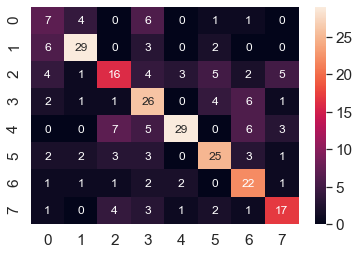

<Figure size 432x288 with 0 Axes>

In [32]:
cnnRavdess.evaluate();

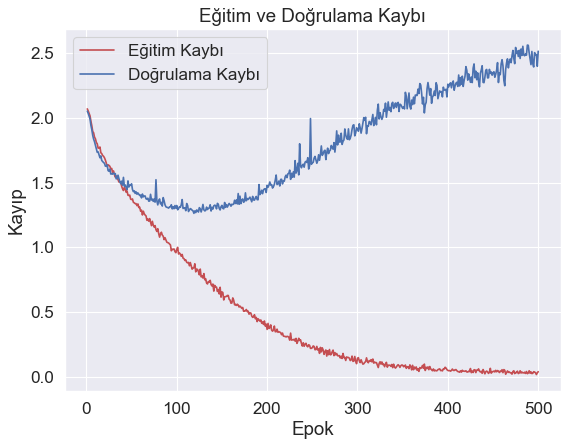

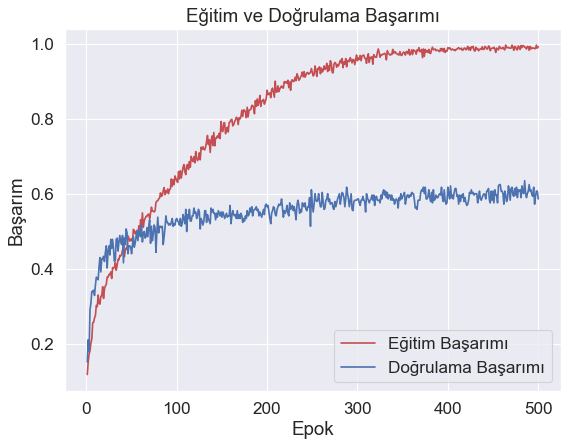

In [33]:
cnnRavdess.printHistory(historyRavdess)

In [43]:
#Test Only TESS
cnnTess = cnn(YNc_Tess-1,X_Norm_Tess,0.2,0.2);
cnnTess.split_train_test();
cnnTess.build_model();

built cnn model..
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 40, 26, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 38, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 19, 12, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 19, 12, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 19, 12, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 17, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 

In [44]:
startTime = time();
historyTess = cnnTess.train();
time()-startTime

training model
Epoch 1/500
53/53 [==============================] - 6s 94ms/step - loss: 2.0169 - accuracy: 0.1627 - val_loss: 1.8653 - val_accuracy: 0.3607

Epoch 00001: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 2/500
53/53 [==============================] - 5s 87ms/step - loss: 1.8266 - accuracy: 0.2836 - val_loss: 1.5122 - val_accuracy: 0.6232

Epoch 00002: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 3/500
53/53 [==============================] - 5s 97ms/step - loss: 1.4611 - accuracy: 0.4491 - val_loss: 1.0019 - val_accuracy: 0.7446

Epoch 00003: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 4/500
53/53 [==============================] - 5s 87ms/step - loss: 1.0218 - accuracy: 0.6264 - val_loss: 0.6445 - val_accuracy: 0.7982

Epoch 00004: s


Epoch 00030: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 31/500
53/53 [==============================] - 6s 111ms/step - loss: 0.0819 - accuracy: 0.9733 - val_loss: 0.1020 - val_accuracy: 0.9679

Epoch 00031: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 32/500
53/53 [==============================] - 6s 106ms/step - loss: 0.0701 - accuracy: 0.9749 - val_loss: 0.1040 - val_accuracy: 0.9661

Epoch 00032: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 33/500
53/53 [==============================] - 5s 100ms/step - loss: 0.0808 - accuracy: 0.9777 - val_loss: 0.1029 - val_accuracy: 0.9607

Epoch 00033: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 34/500
53/53 [============

53/53 [==============================] - 5s 101ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0679 - val_accuracy: 0.9804

Epoch 00060: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 61/500
53/53 [==============================] - 5s 95ms/step - loss: 0.0417 - accuracy: 0.9840 - val_loss: 0.0692 - val_accuracy: 0.9804

Epoch 00061: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 62/500
53/53 [==============================] - 6s 109ms/step - loss: 0.0292 - accuracy: 0.9900 - val_loss: 0.0716 - val_accuracy: 0.9732

Epoch 00062: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 63/500
53/53 [==============================] - 6s 107ms/step - loss: 0.0387 - accuracy: 0.9911 - val_loss: 0.0688 - val_accuracy: 0.9768

Epoch 00063: saving model to /home/

53/53 [==============================] - 6s 105ms/step - loss: 0.0171 - accuracy: 0.9936 - val_loss: 0.0628 - val_accuracy: 0.9804

Epoch 00090: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 91/500
53/53 [==============================] - 6s 116ms/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.0754 - val_accuracy: 0.9786

Epoch 00091: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 92/500
53/53 [==============================] - 6s 118ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.0676 - val_accuracy: 0.9786

Epoch 00092: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 93/500
53/53 [==============================] - 7s 124ms/step - loss: 0.0120 - accuracy: 0.9953 - val_loss: 0.0655 - val_accuracy: 0.9821

Epoch 00093: saving model to /home


Epoch 00119: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 120/500
53/53 [==============================] - 6s 111ms/step - loss: 0.0070 - accuracy: 0.9976 - val_loss: 0.0740 - val_accuracy: 0.9804

Epoch 00120: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 121/500
53/53 [==============================] - 6s 116ms/step - loss: 0.0047 - accuracy: 0.9978 - val_loss: 0.0770 - val_accuracy: 0.9821

Epoch 00121: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 122/500
53/53 [==============================] - 6s 123ms/step - loss: 0.0117 - accuracy: 0.9942 - val_loss: 0.0704 - val_accuracy: 0.9821

Epoch 00122: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 123/500
53/53 [========

53/53 [==============================] - 6s 110ms/step - loss: 0.0056 - accuracy: 0.9970 - val_loss: 0.0702 - val_accuracy: 0.9857

Epoch 00149: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 150/500
53/53 [==============================] - 6s 107ms/step - loss: 0.0036 - accuracy: 0.9998 - val_loss: 0.0784 - val_accuracy: 0.9821

Epoch 00150: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 151/500
53/53 [==============================] - 6s 110ms/step - loss: 0.0066 - accuracy: 0.9965 - val_loss: 0.0768 - val_accuracy: 0.9839

Epoch 00151: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 152/500
53/53 [==============================] - 6s 106ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0749 - val_accuracy: 0.9839

Epoch 00152: saving model to /h


Epoch 00178: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 179/500
53/53 [==============================] - 4s 83ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0713 - val_accuracy: 0.9857

Epoch 00179: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 180/500
53/53 [==============================] - 5s 87ms/step - loss: 0.0025 - accuracy: 0.9987 - val_loss: 0.0744 - val_accuracy: 0.9821

Epoch 00180: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 181/500
53/53 [==============================] - 5s 86ms/step - loss: 0.0052 - accuracy: 0.9980 - val_loss: 0.0873 - val_accuracy: 0.9821

Epoch 00181: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 182/500
53/53 [===========

53/53 [==============================] - 5s 88ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.0877 - val_accuracy: 0.9821

Epoch 00208: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 209/500
53/53 [==============================] - 5s 89ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0752 - val_accuracy: 0.9821

Epoch 00209: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 210/500
53/53 [==============================] - 5s 89ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0734 - val_accuracy: 0.9839

Epoch 00210: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 211/500
53/53 [==============================] - 5s 96ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0875 - val_accuracy: 0.9839

Epoch 00211: saving model to /home/


Epoch 00237: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 238/500
53/53 [==============================] - 5s 98ms/step - loss: 4.1056e-04 - accuracy: 1.0000 - val_loss: 0.0979 - val_accuracy: 0.9839

Epoch 00238: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 239/500
53/53 [==============================] - 6s 107ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.1066 - val_accuracy: 0.9839

Epoch 00239: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 240/500
53/53 [==============================] - 6s 106ms/step - loss: 5.8862e-04 - accuracy: 0.9996 - val_loss: 0.0979 - val_accuracy: 0.9804

Epoch 00240: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 241/500
53/53 [=

53/53 [==============================] - 5s 91ms/step - loss: 0.0014 - accuracy: 0.9991 - val_loss: 0.0955 - val_accuracy: 0.9857

Epoch 00267: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 268/500
53/53 [==============================] - 5s 94ms/step - loss: 4.4597e-04 - accuracy: 0.9998 - val_loss: 0.1033 - val_accuracy: 0.9821

Epoch 00268: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 269/500
53/53 [==============================] - 5s 94ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.1051 - val_accuracy: 0.9821

Epoch 00269: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 270/500
53/53 [==============================] - 6s 111ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.1025 - val_accuracy: 0.9804

Epoch 00270: saving model to /

53/53 [==============================] - 5s 96ms/step - loss: 0.0050 - accuracy: 0.9979 - val_loss: 0.1082 - val_accuracy: 0.9839

Epoch 00296: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 297/500
53/53 [==============================] - 6s 105ms/step - loss: 7.2836e-04 - accuracy: 1.0000 - val_loss: 0.0978 - val_accuracy: 0.9804

Epoch 00297: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 298/500
53/53 [==============================] - 5s 100ms/step - loss: 0.0019 - accuracy: 0.9990 - val_loss: 0.0858 - val_accuracy: 0.9839

Epoch 00298: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 299/500
53/53 [==============================] - 5s 103ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1060 - val_accuracy: 0.9839

Epoch 00299: saving model to

53/53 [==============================] - 5s 102ms/step - loss: 1.7282e-04 - accuracy: 1.0000 - val_loss: 0.1006 - val_accuracy: 0.9821

Epoch 00325: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 326/500
53/53 [==============================] - 5s 103ms/step - loss: 2.3616e-04 - accuracy: 0.9997 - val_loss: 0.1015 - val_accuracy: 0.9839

Epoch 00326: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 327/500
53/53 [==============================] - 6s 105ms/step - loss: 2.7951e-04 - accuracy: 0.9998 - val_loss: 0.1007 - val_accuracy: 0.9821

Epoch 00327: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 328/500
53/53 [==============================] - 5s 103ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.1174 - val_accuracy: 0.9804

Epoch 00328: saving

53/53 [==============================] - 6s 110ms/step - loss: 4.4587e-05 - accuracy: 1.0000 - val_loss: 0.1118 - val_accuracy: 0.9821

Epoch 00354: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 355/500
53/53 [==============================] - 5s 90ms/step - loss: 2.7392e-04 - accuracy: 1.0000 - val_loss: 0.1030 - val_accuracy: 0.9857

Epoch 00355: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 356/500
53/53 [==============================] - 5s 102ms/step - loss: 6.0525e-04 - accuracy: 1.0000 - val_loss: 0.1152 - val_accuracy: 0.9821

Epoch 00356: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 357/500
53/53 [==============================] - 7s 124ms/step - loss: 7.7815e-04 - accuracy: 0.9998 - val_loss: 0.1030 - val_accuracy: 0.9821

Epoch 00357: sav

53/53 [==============================] - 6s 107ms/step - loss: 3.5063e-04 - accuracy: 1.0000 - val_loss: 0.1096 - val_accuracy: 0.9804

Epoch 00383: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 384/500
53/53 [==============================] - 6s 122ms/step - loss: 2.4306e-04 - accuracy: 0.9998 - val_loss: 0.1067 - val_accuracy: 0.9821

Epoch 00384: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 385/500
53/53 [==============================] - 6s 114ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1058 - val_accuracy: 0.9839

Epoch 00385: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 386/500
53/53 [==============================] - 6s 108ms/step - loss: 1.5660e-04 - accuracy: 1.0000 - val_loss: 0.1051 - val_accuracy: 0.9839

Epoch 00386: saving

53/53 [==============================] - 6s 110ms/step - loss: 9.4151e-04 - accuracy: 0.9995 - val_loss: 0.1186 - val_accuracy: 0.9839

Epoch 00412: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 413/500
53/53 [==============================] - 6s 120ms/step - loss: 5.9257e-05 - accuracy: 1.0000 - val_loss: 0.1112 - val_accuracy: 0.9821

Epoch 00413: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 414/500
53/53 [==============================] - 5s 102ms/step - loss: 2.6045e-05 - accuracy: 1.0000 - val_loss: 0.1250 - val_accuracy: 0.9839

Epoch 00414: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 415/500
53/53 [==============================] - 6s 112ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.1005 - val_accuracy: 0.9839

Epoch 00415: saving

53/53 [==============================] - 6s 114ms/step - loss: 8.5571e-04 - accuracy: 0.9995 - val_loss: 0.1285 - val_accuracy: 0.9839

Epoch 00441: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 442/500
53/53 [==============================] - 6s 113ms/step - loss: 0.0011 - accuracy: 0.9991 - val_loss: 0.1183 - val_accuracy: 0.9821

Epoch 00442: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 443/500
53/53 [==============================] - 5s 100ms/step - loss: 1.6519e-05 - accuracy: 1.0000 - val_loss: 0.1241 - val_accuracy: 0.9821

Epoch 00443: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 444/500
53/53 [==============================] - 5s 103ms/step - loss: 6.5838e-04 - accuracy: 0.9995 - val_loss: 0.1241 - val_accuracy: 0.9857

Epoch 00444: saving

53/53 [==============================] - 6s 110ms/step - loss: 3.3755e-05 - accuracy: 1.0000 - val_loss: 0.1388 - val_accuracy: 0.9839

Epoch 00470: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 471/500
53/53 [==============================] - 6s 111ms/step - loss: 2.0602e-04 - accuracy: 1.0000 - val_loss: 0.1352 - val_accuracy: 0.9804

Epoch 00471: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 472/500
53/53 [==============================] - 5s 101ms/step - loss: 4.3587e-05 - accuracy: 1.0000 - val_loss: 0.1190 - val_accuracy: 0.9839

Epoch 00472: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 473/500
53/53 [==============================] - 5s 102ms/step - loss: 3.6365e-05 - accuracy: 1.0000 - val_loss: 0.1219 - val_accuracy: 0.9839

Epoch 00473: sa

53/53 [==============================] - 7s 124ms/step - loss: 1.8830e-06 - accuracy: 1.0000 - val_loss: 0.1155 - val_accuracy: 0.9893

Epoch 00499: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 500/500
53/53 [==============================] - 7s 123ms/step - loss: 1.5490e-04 - accuracy: 0.9999 - val_loss: 0.1360 - val_accuracy: 0.9875

Epoch 00500: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5


2834.7737052440643

In [45]:
cnnTess.evaluate();

18/18 [==============================] - 1s 25ms/step - loss: 0.0367 - accuracy: 0.9929
Test loss: 0.036680836230516434
Test accuracy: 0.9928571581840515
(560,) (560,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           2       0.99      0.98      0.98        85
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        74
           5       1.00      0.99      0.99        69
           6       0.99      1.00      0.99        79
           7       0.98      0.99      0.98        94

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560

[[73  0  0  0  0  0  0]
 [ 0 83  0  0  0  0  2]
 [ 0  0 86  0  0  0  0]
 [ 0  0  0 74  0  0  0]
 [ 0  1  0  0 68  0  0]
 [ 0  0  0  0  0 79  0]
 [ 0  0  0  0  0  1 93]]


ValueError: Shape of passed values is (7, 7), indices imply (8, 8)

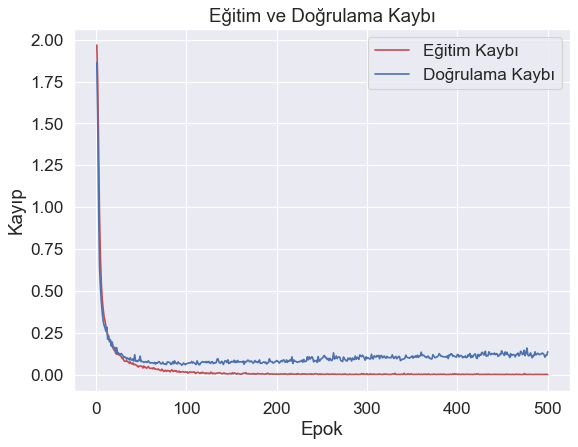

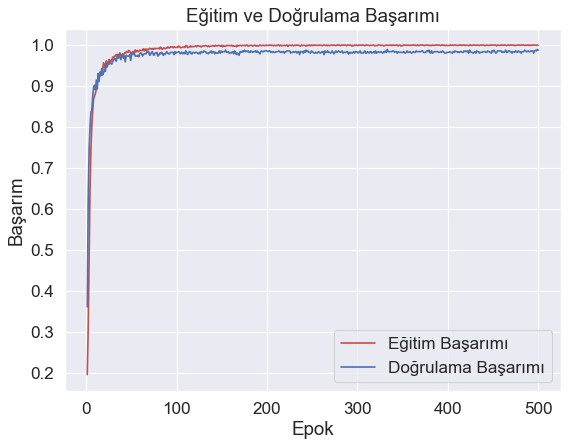

In [46]:
cnnTess.printHistory(historyTess)

In [50]:
#Test With Both

#Prepare Data First
X_Norm = np.concatenate((X_Norm_Rav,X_Norm_Tess),axis=0)
YNc = np.concatenate((YNc_Rav[:,0].reshape((len(YNc_Rav),1)),YNc_Tess),axis=0)
#Prepare CNN
cnnBoth = cnn(YNc -1,X_Norm,0.2,0.2)
cnnBoth.split_train_test();
cnnBoth.build_model();

built cnn model..
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 13, 26, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 12, 32)         0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 5, 12, 32)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 5, 12, 64)         18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 3, 10, 64)         36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 

In [51]:
startTime = time();
historyBoth = cnnBoth.train();
time()-startTime

training model
Epoch 1/500
80/80 [==============================] - 4s 37ms/step - loss: 2.0669 - accuracy: 0.1468 - val_loss: 2.0384 - val_accuracy: 0.1392

Epoch 00001: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 2/500
80/80 [==============================] - 2s 28ms/step - loss: 2.0439 - accuracy: 0.1526 - val_loss: 2.0298 - val_accuracy: 0.1710

Epoch 00002: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 3/500
80/80 [==============================] - 2s 26ms/step - loss: 2.0398 - accuracy: 0.1365 - val_loss: 2.0162 - val_accuracy: 0.2606

Epoch 00003: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 4/500
80/80 [==============================] - 2s 29ms/step - loss: 2.0236 - accuracy: 0.1679 - val_loss: 1.9974 - val_accuracy: 0.2830

Epoch 00004: s

80/80 [==============================] - 3s 37ms/step - loss: 1.1190 - accuracy: 0.5660 - val_loss: 1.0285 - val_accuracy: 0.6108

Epoch 00031: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 32/500
80/80 [==============================] - 3s 42ms/step - loss: 1.1264 - accuracy: 0.5835 - val_loss: 1.0441 - val_accuracy: 0.6002

Epoch 00032: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 33/500
80/80 [==============================] - 2s 30ms/step - loss: 1.0910 - accuracy: 0.5886 - val_loss: 1.0553 - val_accuracy: 0.5802

Epoch 00033: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 34/500
80/80 [==============================] - 2s 30ms/step - loss: 1.0938 - accuracy: 0.5728 - val_loss: 0.9720 - val_accuracy: 0.6344

Epoch 00034: saving model to /home/cze

80/80 [==============================] - 2s 30ms/step - loss: 0.7758 - accuracy: 0.7038 - val_loss: 0.7658 - val_accuracy: 0.7158

Epoch 00061: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 62/500
80/80 [==============================] - 2s 24ms/step - loss: 0.7950 - accuracy: 0.7151 - val_loss: 0.7210 - val_accuracy: 0.7288

Epoch 00062: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 63/500
80/80 [==============================] - 2s 26ms/step - loss: 0.8024 - accuracy: 0.6942 - val_loss: 0.7316 - val_accuracy: 0.7252

Epoch 00063: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 64/500
80/80 [==============================] - 2s 28ms/step - loss: 0.7928 - accuracy: 0.7004 - val_loss: 0.7173 - val_accuracy: 0.7205

Epoch 00064: saving model to /home/cze

80/80 [==============================] - 3s 32ms/step - loss: 0.6331 - accuracy: 0.7584 - val_loss: 0.6463 - val_accuracy: 0.7524

Epoch 00091: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 92/500
80/80 [==============================] - 4s 53ms/step - loss: 0.6417 - accuracy: 0.7698 - val_loss: 0.6424 - val_accuracy: 0.7488

Epoch 00092: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 93/500
80/80 [==============================] - 2s 27ms/step - loss: 0.6447 - accuracy: 0.7532 - val_loss: 0.6251 - val_accuracy: 0.7677

Epoch 00093: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 94/500
80/80 [==============================] - 3s 33ms/step - loss: 0.6197 - accuracy: 0.7723 - val_loss: 0.6019 - val_accuracy: 0.7759

Epoch 00094: saving model to /home/cze

80/80 [==============================] - 2s 24ms/step - loss: 0.5167 - accuracy: 0.8048 - val_loss: 0.5920 - val_accuracy: 0.7818

Epoch 00121: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 122/500
80/80 [==============================] - 2s 23ms/step - loss: 0.5082 - accuracy: 0.8186 - val_loss: 0.5903 - val_accuracy: 0.7700

Epoch 00122: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 123/500
80/80 [==============================] - 2s 25ms/step - loss: 0.4930 - accuracy: 0.8280 - val_loss: 0.5578 - val_accuracy: 0.7842

Epoch 00123: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 124/500
80/80 [==============================] - 2s 29ms/step - loss: 0.5248 - accuracy: 0.8077 - val_loss: 0.5822 - val_accuracy: 0.7783

Epoch 00124: saving model to /home/

80/80 [==============================] - 2s 27ms/step - loss: 0.4224 - accuracy: 0.8497 - val_loss: 0.5345 - val_accuracy: 0.7983

Epoch 00151: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 152/500
80/80 [==============================] - 3s 33ms/step - loss: 0.4368 - accuracy: 0.8447 - val_loss: 0.5439 - val_accuracy: 0.7983

Epoch 00152: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 153/500
80/80 [==============================] - 2s 27ms/step - loss: 0.4249 - accuracy: 0.8378 - val_loss: 0.5351 - val_accuracy: 0.7983

Epoch 00153: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 154/500
80/80 [==============================] - 3s 33ms/step - loss: 0.4509 - accuracy: 0.8312 - val_loss: 0.5819 - val_accuracy: 0.7913

Epoch 00154: saving model to /home/

80/80 [==============================] - 2s 27ms/step - loss: 0.3795 - accuracy: 0.8575 - val_loss: 0.5358 - val_accuracy: 0.8019

Epoch 00181: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 182/500
80/80 [==============================] - 2s 31ms/step - loss: 0.3815 - accuracy: 0.8555 - val_loss: 0.5196 - val_accuracy: 0.8031

Epoch 00182: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 183/500
80/80 [==============================] - 3s 34ms/step - loss: 0.3817 - accuracy: 0.8660 - val_loss: 0.5319 - val_accuracy: 0.8078

Epoch 00183: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 184/500
80/80 [==============================] - 3s 36ms/step - loss: 0.3788 - accuracy: 0.8595 - val_loss: 0.5233 - val_accuracy: 0.8160

Epoch 00184: saving model to /home/

80/80 [==============================] - 3s 32ms/step - loss: 0.3372 - accuracy: 0.8800 - val_loss: 0.5200 - val_accuracy: 0.8101

Epoch 00211: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 212/500
80/80 [==============================] - 2s 27ms/step - loss: 0.3495 - accuracy: 0.8806 - val_loss: 0.5274 - val_accuracy: 0.8172

Epoch 00212: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 213/500
80/80 [==============================] - 2s 28ms/step - loss: 0.3435 - accuracy: 0.8823 - val_loss: 0.5643 - val_accuracy: 0.8019

Epoch 00213: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 214/500
80/80 [==============================] - 4s 56ms/step - loss: 0.3376 - accuracy: 0.8805 - val_loss: 0.5264 - val_accuracy: 0.8078

Epoch 00214: saving model to /home/

80/80 [==============================] - 3s 36ms/step - loss: 0.2564 - accuracy: 0.9081 - val_loss: 0.5189 - val_accuracy: 0.8125

Epoch 00241: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 242/500
80/80 [==============================] - 2s 29ms/step - loss: 0.3036 - accuracy: 0.8926 - val_loss: 0.5466 - val_accuracy: 0.8066

Epoch 00242: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 243/500
80/80 [==============================] - 4s 45ms/step - loss: 0.2687 - accuracy: 0.8990 - val_loss: 0.5195 - val_accuracy: 0.8137

Epoch 00243: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 244/500
80/80 [==============================] - 4s 49ms/step - loss: 0.2725 - accuracy: 0.9018 - val_loss: 0.5151 - val_accuracy: 0.8125

Epoch 00244: saving model to /home/

80/80 [==============================] - 4s 49ms/step - loss: 0.2407 - accuracy: 0.9152 - val_loss: 0.5501 - val_accuracy: 0.8196

Epoch 00271: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 272/500
80/80 [==============================] - 4s 55ms/step - loss: 0.2522 - accuracy: 0.9076 - val_loss: 0.5445 - val_accuracy: 0.8172

Epoch 00272: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 273/500
80/80 [==============================] - 4s 53ms/step - loss: 0.2352 - accuracy: 0.9087 - val_loss: 0.5244 - val_accuracy: 0.8031

Epoch 00273: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 274/500
80/80 [==============================] - 3s 33ms/step - loss: 0.2546 - accuracy: 0.9108 - val_loss: 0.5444 - val_accuracy: 0.8066

Epoch 00274: saving model to /home/

80/80 [==============================] - 2s 25ms/step - loss: 0.2218 - accuracy: 0.9174 - val_loss: 0.5417 - val_accuracy: 0.8113

Epoch 00301: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 302/500
80/80 [==============================] - 3s 32ms/step - loss: 0.2065 - accuracy: 0.9258 - val_loss: 0.5571 - val_accuracy: 0.8090

Epoch 00302: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 303/500
80/80 [==============================] - 4s 44ms/step - loss: 0.1891 - accuracy: 0.9375 - val_loss: 0.5302 - val_accuracy: 0.8184

Epoch 00303: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 304/500
80/80 [==============================] - 2s 29ms/step - loss: 0.2097 - accuracy: 0.9230 - val_loss: 0.5589 - val_accuracy: 0.8172

Epoch 00304: saving model to /home/

80/80 [==============================] - 2s 30ms/step - loss: 0.1657 - accuracy: 0.9412 - val_loss: 0.5801 - val_accuracy: 0.8172

Epoch 00331: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 332/500
80/80 [==============================] - 2s 31ms/step - loss: 0.1641 - accuracy: 0.9456 - val_loss: 0.5686 - val_accuracy: 0.8149

Epoch 00332: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 333/500
80/80 [==============================] - 3s 36ms/step - loss: 0.1819 - accuracy: 0.9387 - val_loss: 0.5746 - val_accuracy: 0.8137

Epoch 00333: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 334/500
80/80 [==============================] - 2s 30ms/step - loss: 0.1713 - accuracy: 0.9295 - val_loss: 0.5601 - val_accuracy: 0.8184

Epoch 00334: saving model to /home/

80/80 [==============================] - 2s 31ms/step - loss: 0.1528 - accuracy: 0.9479 - val_loss: 0.5950 - val_accuracy: 0.8196

Epoch 00361: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 362/500
80/80 [==============================] - 2s 30ms/step - loss: 0.1385 - accuracy: 0.9503 - val_loss: 0.5967 - val_accuracy: 0.8314

Epoch 00362: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 363/500
80/80 [==============================] - 3s 34ms/step - loss: 0.1533 - accuracy: 0.9403 - val_loss: 0.6052 - val_accuracy: 0.8172

Epoch 00363: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 364/500
80/80 [==============================] - 2s 30ms/step - loss: 0.1507 - accuracy: 0.9524 - val_loss: 0.5836 - val_accuracy: 0.8125

Epoch 00364: saving model to /home/

80/80 [==============================] - 2s 28ms/step - loss: 0.1370 - accuracy: 0.9478 - val_loss: 0.5846 - val_accuracy: 0.8160

Epoch 00391: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 392/500
80/80 [==============================] - 2s 26ms/step - loss: 0.1258 - accuracy: 0.9534 - val_loss: 0.6009 - val_accuracy: 0.8149

Epoch 00392: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 393/500
80/80 [==============================] - 2s 29ms/step - loss: 0.1306 - accuracy: 0.9505 - val_loss: 0.5885 - val_accuracy: 0.8196

Epoch 00393: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 394/500
80/80 [==============================] - 3s 36ms/step - loss: 0.1209 - accuracy: 0.9548 - val_loss: 0.6119 - val_accuracy: 0.8090

Epoch 00394: saving model to /home/

80/80 [==============================] - 3s 34ms/step - loss: 0.1080 - accuracy: 0.9610 - val_loss: 0.6255 - val_accuracy: 0.8160

Epoch 00421: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 422/500
80/80 [==============================] - 3s 33ms/step - loss: 0.1177 - accuracy: 0.9622 - val_loss: 0.5815 - val_accuracy: 0.8196

Epoch 00422: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 423/500
80/80 [==============================] - 3s 40ms/step - loss: 0.0933 - accuracy: 0.9730 - val_loss: 0.5921 - val_accuracy: 0.8196

Epoch 00423: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 424/500
80/80 [==============================] - 3s 32ms/step - loss: 0.1063 - accuracy: 0.9676 - val_loss: 0.6067 - val_accuracy: 0.8101

Epoch 00424: saving model to /home/

80/80 [==============================] - 4s 48ms/step - loss: 0.0990 - accuracy: 0.9636 - val_loss: 0.6668 - val_accuracy: 0.8137

Epoch 00451: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 452/500
80/80 [==============================] - 3s 32ms/step - loss: 0.1044 - accuracy: 0.9697 - val_loss: 0.6366 - val_accuracy: 0.8208

Epoch 00452: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 453/500
80/80 [==============================] - 3s 37ms/step - loss: 0.1077 - accuracy: 0.9697 - val_loss: 0.6669 - val_accuracy: 0.8160

Epoch 00453: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 454/500
80/80 [==============================] - 3s 38ms/step - loss: 0.1059 - accuracy: 0.9617 - val_loss: 0.6656 - val_accuracy: 0.8160

Epoch 00454: saving model to /home/

80/80 [==============================] - 5s 58ms/step - loss: 0.0953 - accuracy: 0.9675 - val_loss: 0.7068 - val_accuracy: 0.8090

Epoch 00481: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 482/500
80/80 [==============================] - 4s 50ms/step - loss: 0.0900 - accuracy: 0.9742 - val_loss: 0.6828 - val_accuracy: 0.8137

Epoch 00482: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 483/500
80/80 [==============================] - 3s 32ms/step - loss: 0.0777 - accuracy: 0.9695 - val_loss: 0.7478 - val_accuracy: 0.8125

Epoch 00483: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Huang_Saved_Models/keras_cnn_trained_model.h5
Epoch 484/500
80/80 [==============================] - 2s 27ms/step - loss: 0.0954 - accuracy: 0.9674 - val_loss: 0.6845 - val_accuracy: 0.8172

Epoch 00484: saving model to /home/

1451.0636599063873

27/27 [==============================] - 0s 8ms/step - loss: 0.5794 - accuracy: 0.8349
Test loss: 0.5793547034263611
Test accuracy: 0.8349056839942932
(848,) (848,)
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        98
           1       0.71      0.75      0.73        36
           2       0.83      0.87      0.85       126
           3       0.75      0.87      0.81       108
           4       0.82      0.94      0.88       115
           5       0.93      0.82      0.87       141
           6       0.84      0.80      0.82       109
           7       0.82      0.79      0.81       115

    accuracy                           0.83       848
   macro avg       0.83      0.83      0.82       848
weighted avg       0.84      0.83      0.84       848

[[ 77   7   4   5   0   2   2   1]
 [  1  27   0   7   0   1   0   0]
 [  2   0 109   5   2   1   2   5]
 [  2   3   0  94   2   0   5   2]
 [  0   0   0   1 108   0   4   2]
 [  2   1

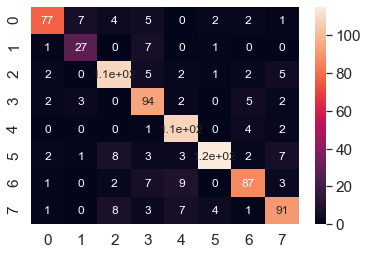

<Figure size 432x288 with 0 Axes>

In [52]:
cnnBoth.evaluate();

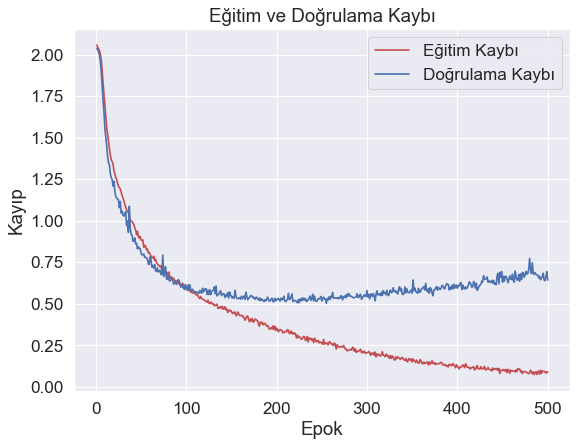

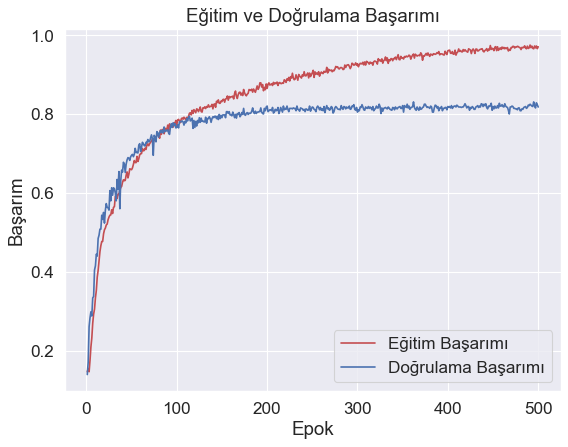

In [53]:
cnnBoth.printHistory(historyBoth)

In [9]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = sorted(os.listdir(dirName))
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)                
    return allFiles

In [3]:
def getDatasetStats(pathName,IsRavdess = True):
    length = [];
    labels = [0]*8;
    fileList = getListOfFiles(pathName);
    for entry in fileList:
        #Calculate length
        audio = librosa.load(entry,sr=SR)[0];
        length.append(len(librosa.effects.trim(audio)[0]));
        #Calculate and classify the labels
        labels[extractFromFName(entry,False,IsRavdess)[0]-1]+=1;
    meanLength,minLength,maxLength = np.mean(length),np.min(length),np.max(length);
    minLength = np.min(length)
    return [meanLength,minLength,maxLength],labels;

In [4]:
def classifyData(fileName,cFunc=True,IsRavdess = True): #boolList:boolen val that defines if used for singular or list form
    #3 Emotion (1-Neutral 2-Calm 3-Happy 4-Sad 5-Angry 6-Scared 7-Disgust 8-Surprised)
    #4 Emotional Intensity(1-Normal 2-Strong)
    #7 Actor (%2 == 1 Male %2 == 0 Female)
        dataFeature = list();
        fileList = getListOfFiles(fileName)
        for entry in fileList:
            dataFeature.append(extractFromFName(entry,cFunc,IsRavdess));
        return dataFeature;

def extractFromFName(fileName,cFunc,IsRavdess = True):
    #cFunc: Boolean val that enables/disables the classifyFunc
    if IsRavdess:
        fileName = fileName.split('/')[-1]; #Choosing the filename only
        fileName = fileName.split('.')[0].split('-'); #Removing .wav then splitting info numbers
        fileName = [int(i) for i in fileName]; #Converting string array into int array
        if(cFunc == True):
            val = classifyFunc([fileName[2],fileName[3],fileName[6]%2]);
        else:
            val = [fileName[2],fileName[3],fileName[6]%2];
    else: #TESS Dataset Extraction
        TessLabels = {'angry':5,'disgust':7,'fear':6,'happy':3,'neutral':1,'ps':8,'sad':4}
        prefix = fileName.split('_')[-1].split('.')[0]     
        val = [TessLabels[prefix]]
    
    return val
    
def classifyFunc(nameArr):
    emClass = ['Neutral','Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised'];
    em,emInt,gender = emClass[nameArr[0]-1],('Normal', 'Strong') [nameArr[1]%2==0],\
    ('Male', 'Female') [nameArr[2]%2==0];
    nameArr = [em,emInt,gender];
    return nameArr;

In [5]:
def extractMFCCFeature(pathName,length,nMfcc=13):
    wavFiles = getListOfFiles(pathName);
    colNumber = int(np.ceil(length/HOP_LENGTH));
    featureVec = np.zeros((len(wavFiles),nMfcc,colNumber));
    k = 0;
    for entry in wavFiles:
        wavOrig = librosa.load(entry, res_type='kaiser_fast',sr=SR)[0];
        X  = librosa.effects.trim(wavOrig)[0];
        padding = length - len(X);
        X = np.concatenate((np.zeros(padding//2), X, np.zeros(padding-padding//2)));
        
        assert len(X) == length
        featureVec[k,:,:] = librosa.feature.mfcc(y=X, sr=SR, n_mfcc=nMfcc, hop_length=HOP_LENGTH);
            
        k = k+1
    return featureVec;

In [6]:
def dataNormalization(X):
    mean = np.mean(X, axis=(1,2), keepdims=True);
    std = np.std(X,axis=(1,2),keepdims=True);
    X = (X-mean)/std;
    return X;

In [7]:
class cnn:
    def __init__(self, labels, features, validation_size=0.2, test_size=0.2, num_classes=8, epochs=500,
                 batch_size=32):  # not sure if ideal // hyperparmeter tuning needed
        self.labels = labels
        self.features = features
        self.validation_size = validation_size
        self.test_size = test_size
        self.x_train = None
        self.y_train = None
        self.x_validation = None
        self.y_validation = None
        self.x_test = None
        self.y_test = None
        self.model = None
        self.num_classes = num_classes
        self.epochs = epochs
        self.batch_size = batch_size

    def split_train_test(self):
        self.x_train, self.x_validation, self.y_train, self.y_validation = sklearn.model_selection.train_test_split(
            self.features, self.labels, test_size=self.validation_size, random_state=np.random)
        
        testRatio = 1/((1 - self.test_size)/self.validation_size)
        self.x_train, self.x_test, self.y_train, self.y_test = sklearn.model_selection.train_test_split(
            self.x_train, self.y_train, test_size=testRatio, random_state=np.random)
        
        # we need to transform x and turn y into one hot
        self.x_train = self.x_train[..., np.newaxis] # add new dimension
        self.x_validation = self.x_validation[..., np.newaxis] 
        self.x_test = self.x_test[..., np.newaxis] 
        self.y_train = keras.utils.to_categorical(self.y_train, self.num_classes)
        self.y_validation = keras.utils.to_categorical(self.y_validation, self.num_classes)
        self.y_test = keras.utils.to_categorical(self.y_test, self.num_classes) 
        
        #Save Variables
        if os.path.exists(os.getcwd()+'/Variables/Huang/dataVariables_Huang.pkl') == False:
            if os.path.exists(os.getcwd()+'/Variables/Huang/') == False: 
                os.makedirs(os.getcwd()+"/Variables/Huang")
            pickle_out = open("Variables/Huang/dataVariables_Huang.pkl","wb")
        
        with open('Variables/Huang/dataVariables_Huang.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
            pickle.dump([self.x_train,self.x_validation,self.x_test,self.y_train,self.y_validation,self.y_test], f)

    def loadPreviousVariables(self):
        with open('Variables/Huang/dataVariables_Huang.pkl','rb') as f:  # Python 3: open(..., 'rb')
            self.x_train,self.x_validation,self.x_test,self.y_train,self.y_validation,self.y_test = pickle.load(f)
        
    def build_model(self):
        layers = keras.layers
        
        self.model = keras.Sequential([
            layers.Conv2D(32, (3, 3), padding='same',
                          activation=tf.nn.relu, input_shape=self.x_train.shape[1:]),
            layers.Conv2D(32, (3, 3), activation=tf.nn.relu),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Dropout(0.25),
            

            layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
            layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Dropout(0.25),
            

            layers.Flatten(),
            layers.Dense(512, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(self.num_classes, activation='softmax')
        ])  # model based off cifar10 dataset, should be deep enough
        # initiate RMSprop optimizer
        opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
        # Let's train the model using RMSprop
        self.model.compile(loss='categorical_crossentropy',
                           optimizer=opt,
                           metrics=['accuracy'],)
        print("built cnn model..")
        print(self.model.summary())

    def train(self):
        print("training model")
        # may want to change this
        save_dir = os.path.join(os.getcwd(), 'Huang_Saved_Models')
        model_name = 'keras_cnn_trained_model.h5'
        # model_name = 'cnn_trained_model-{epoch:02d}-{val_acc:.2f}.h5'
        if not os.path.isdir(save_dir):
            os.makedirs(save_dir)
        model_path = os.path.join(save_dir, model_name)
        # if os.path.isfile(model_path):
        #     self.model.load_weights(model_path)
        # may want to change save_best to true
        checkpoint = ModelCheckpoint(
            model_path, monitor='val_acc', verbose=1, save_best_only=False, mode='max')
        tensorboard = TensorBoard(log_dir="logs/{}".format(time()), write_graph=True,
                                  write_images=True, histogram_freq=0)
        history = self.model.fit(self.x_train, self.y_train,
                  batch_size=self.batch_size,
                  epochs=self.epochs,
                  validation_data=(self.x_validation, self.y_validation),
                  shuffle=True,
                  callbacks=[tensorboard, checkpoint])
        return history
    
    def printHistory(self,history):
        import matplotlib.pyplot as plt
        from matplotlib.pyplot import figure

        figure(figsize=(8, 6), dpi=80)
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        
        epochs = range(1, len(acc) + 1)
        plt.plot(epochs, loss, 'r-', label='Eğitim Kaybı')
        plt.plot(epochs, val_loss, 'b-', label='Doğrulama Kaybı')
        plt.title('Eğitim ve Doğrulama Kaybı')
        plt.xlabel('Epok')
        plt.ylabel('Kayıp')
        plt.legend()
        plt.show()

        figure(figsize=(8, 6), dpi=80)
        plt.plot(epochs, acc, 'r-', label='Eğitim Başarımı')
        plt.plot(epochs, val_acc, 'b-', label='Doğrulama Başarımı')
        plt.title('Eğitim ve Doğrulama Başarımı')
        plt.xlabel('Epok')
        plt.ylabel('Başarım')
        plt.legend()
        plt.show()
        

    def evaluate(self):
        scores = self.model.evaluate(self.x_test, self.y_test, verbose=1)
        print('Test loss:', scores[0])
        print('Test accuracy:', scores[1])

        from sklearn.metrics import classification_report
        predictions = self.model.predict_classes(self.x_test)
        # add roc_auc
        y_new = np.argmax(self.y_test, axis=1)
        print(np.shape(predictions), np.shape(y_new))
        report = classification_report(y_new, predictions)
        print(report)

        
        matrix = confusion_matrix(y_new, predictions)
        print (matrix)
        df_cm = pd.DataFrame(matrix, range(8),
                  range(8))
        # plt.figure(figsize = (10,7))
        sn.set(font_scale=1.4)#for label size
        sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
        plt.show()
        plt.savefig('confusion_matrix.pdf')
        plt.savefig('confusion_matrix.pgf') # for latex